In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import corner_harris
from PIL import Image
import matplotlib.image as mpimg
from skimage.feature import corner_harris
import matplotlib.image as mpimg
from scipy import spatial
from skimage.feature import peak_local_max
from matplotlib.patches import ConnectionPatch
from corner_detector import corner_detector
from anms import anms
from sklearn.neighbors import NearestNeighbors
from feat_desc import feat_desc
from feat_match import feat_match
from matplotlib.patches import ConnectionPatch
from ransac_est_homography import ransac_est_homography
from scipy import signal
from utils import GaussianPDF_2D
from utils import rgb2gray
from PIL import Image
from utils import visDerivatives

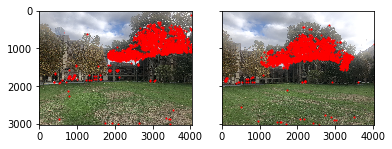

In [2]:
# Step 1 && Step 2
img_1 = mpimg.imread("middle.jpg")
gray_1 = rgb2gray(img_1)
img_2 = mpimg.imread("right.jpg")
gray_2 = rgb2gray(img_2)
# img_1 = cv2.imread('left.jpg')
# img_2 = cv2.imread('middle.jpg')
# gray_1=cv2.imread("left.jpg",0)
# gray_2=cv2.imread("middle.jpg",0)
cimg_1 = corner_detector(gray_1)
cimg_2 = corner_detector(gray_2)
x_1,y_1,r_max_1 = anms(cimg_1,2000)
x_2,y_2,r_max_2 = anms(cimg_2,2000)
x_1 = np.asarray(x_1)
y_1 = np.asarray(y_1)
x_2 = np.asarray(x_2)
y_2 = np.asarray(y_2)
fig, (ax,ay) = plt.subplots(1, 2, sharey=True)
ax.imshow(img_1)
ay.imshow(img_2)
ax.plot(x_1, y_1, color='r', marker='o',
        linestyle='None', markersize=1)
ay.plot(x_2, y_2, color='r', marker='o',
        linestyle='None', markersize=1)
plt.show()

In [4]:
print(x_1.shape)

(2000,)


[   0  221  293  604  811  918  996 1214 1231 1355 1838 1853 1924 1947
 1951 1953 1960 1970 1976 1980 1982]
[ 271 1718  539 1469 1529  992  661 1469  539 1060 1737 1763 1898 1953
 1951 1953 1961 1898 1973 1977 1982]


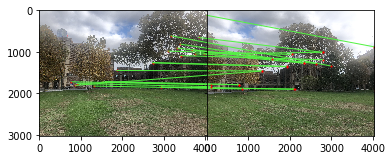

In [5]:
# Step 3 & 4
descs1 = feat_desc(gray_1,x_1,y_1)
descs2 = feat_desc(gray_2,x_2,y_2)
match = feat_match(descs1, descs2)
idx_1 = np.argwhere(match > -1)
idx_1 = idx_1.flatten()
print(idx_1)
idx_2 = np.take(match,idx_1)
idx_2 = idx_2.astype(int)
print(idx_2)
draw_x1 = x_1[idx_1]
draw_y1 = y_1[idx_1]
draw_x2 = x_2[idx_2]
draw_y2 = y_2[idx_2]

# Display Result
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.imshow(img_1)
ax1.plot(draw_x1, draw_y1, color='r', marker='o',
        linestyle='None', markersize=1)

ax2.imshow(img_2)
ax2.plot(draw_x2, draw_y2, color='r', marker='o',
        linestyle='None', markersize=1)


for i in range(draw_x1.size):
    xy1 = (draw_x1[i],draw_y1[i])
    xy2 = (draw_x2[i],draw_y2[i])
    con = ConnectionPatch(xyA=xy2, xyB=xy1, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1, color='#53F242')
    ax2.add_artist(con)

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

In [6]:
ransac_H, inline_idx = ransac_est_homography(draw_x1, draw_y1, draw_x2, draw_y2, 0.5)

----------- ransac_est_homography -----------
[ransac_est_homography] total number of points:  21
update!
num_inline: 4
ssd:
 [5.49849387e+06 1.39452756e+06 1.26905745e+06 2.89427998e+05
 6.27297609e+05 1.58179694e-13 5.29527731e-16 3.65000267e-13
 4.59300927e+05 1.64444345e+06 4.01043018e+05 3.60371922e+05
 2.34904989e+04 6.00505979e+05 1.29549245e+06 5.74218943e+05
 1.59270978e+06 2.28500360e-13 6.10740170e+05 4.98951045e+05
 5.05895908e+05]
update!
num_inline: 5
ssd:
 [4.77086467e+07 5.00647832e+06 1.32410868e+06 9.27794018e+05
 5.14359941e+05 1.57476084e+06 1.20908515e+05 4.42609298e+05
 9.03414858e-17 1.37136753e+05 1.92554661e+04 1.77369210e+04
 9.22939242e+04 5.72176147e+04 5.28143398e-17 2.48589782e+04
 5.79126173e+04 1.15299404e+06 1.29020809e-17 4.58865077e-01
 2.28360186e-18]


In [7]:
thresh = 0.5

img_m = mpimg.imread('right.jpg')
img_l = mpimg.imread('middle.jpg')
NUM_channels = 3

def show_ransac(x1,x2,y1,y2):
    big_im = np.concatenate((img_l, img_m), axis=1)

    plt.imshow(big_im)

    x2_shift = x2 + img_m.shape[1]
    for i in range(x1.shape[0]):
        if inline_idx[i] == 1:
            plt.plot([x1[i], x2_shift[i]], [y1[i], y2[i]], marker="o")
    plt.show()

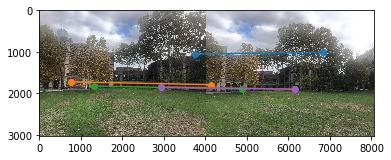

In [8]:
show_ransac(draw_x1,draw_x2,draw_y1,draw_y2)